In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score
import nltk, re, os
from string import punctuation
import scikitplot as skplt
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from nltk.tokenize import word_tokenize, sent_tokenize, ToktokTokenizer, RegexpTokenizer
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from wordcloud import WordCloud
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords, wordnet
import nltk

In [44]:
data = pd.read_csv(r"C:\Users\91934\OneDrive\Desktop\Movie-Recommendation-System-Using-Sentiment-Analysis-main\data_set\IMDB Dataset.csv\IMDB Dataset.csv")

In [45]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [46]:
data.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [47]:
data.shape

(50000, 2)

In [48]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [50]:
data.isna().sum()

review       0
sentiment    0
dtype: int64

C:\Users\91934\AppData\Local\Temp\ipykernel_30160\1246012973.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count = pd.value_counts(data['sentiment'], sort=True)


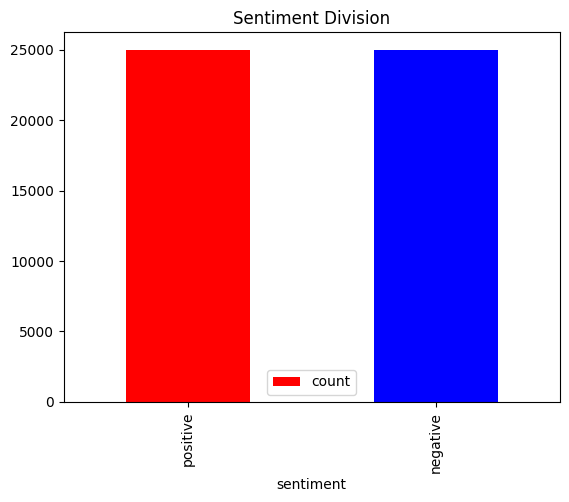

In [51]:
count = pd.value_counts(data['sentiment'], sort=True)
count.plot(kind='bar', color=["red", "blue"])
plt.title('Sentiment Division')
plt.legend()
plt.show()

In [52]:
print ('Positive', round(data['sentiment'].value_counts()['positive'] / len(data) * 100), '%')
print ('Negative', round(data['sentiment'].value_counts()['negative'] / len(data) * 100), '%')

Positive 50 %
Negative 50 %


In [53]:
# Common values
count1 = Counter(" ".join(data[data['sentiment']== 'positive']['review']).\
                 split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)

count2 = Counter(" ".join(data[data['sentiment']== 'negative']['review']).\
                 split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)

In [54]:
df1 = df1.rename(columns={0: "common_words", 1 : "count"})
df1.head(10)

,common_words,count
0,the,291927
1,and,165943
2,a,155775
3,of,149178
4,to,128343
5,is,108168
6,in,90427
7,that,62449
8,I,62223
9,it,53378


In [55]:
df2 = df2.rename(columns={0: "common_words", 1 : "count"})
df2.head(10)

,common_words,count
0,the,276808
1,a,151185
2,and,135976
3,of,134447
4,to,133507
5,is,94888
6,in,79554
7,I,70275
8,that,64369
9,this,62112


In [56]:
tokenizer = ToktokTokenizer()
stopword = stopwords.words('english')

In [57]:
stopword

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [58]:
source = data['review']
target = data['sentiment']

In [59]:
contractions_dict = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [60]:
def expand_contractions(text, contractions_dict):
    contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())), flags=re.IGNORECASE | re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contractions_dict.get(match) \
            if contractions_dict.get(match) \
            else contractions_dict.get(match.lower())
        expanded_contraction = expanded_contraction
        return expanded_contraction

    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text
def cons(text):
    text=expand_contractions(text,contractions_dict)
    return text

In [61]:
source = source.apply(cons)

In [62]:
def to_lower(text) :
    return text.lower()

In [63]:
source = source.apply(to_lower)

In [64]:
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

In [65]:
source = source.apply(remove_special_characters)

In [66]:
def strip_punctuation(s):
    return ''.join(c for c in s if c not in punctuation)

In [67]:
source = source.apply(strip_punctuation)

In [68]:
def replaceElongated(word):
    repeat_regexp = re.compile(r'(\w*)(\w)\2(\w*)')
    repl = r'\1\2\3'
    if wordnet.synsets(word):
        return word
    repl_word = repeat_regexp.sub(repl, word)
    if repl_word != word:      
        return replaceElongated(repl_word)
    else:       
        return repl_word

In [69]:
source = source.apply(replaceElongated)

In [70]:
tokenizer = RegexpTokenizer(r'\w+')

In [71]:
source = source.apply(lambda X : tokenizer.tokenize(X))

In [72]:
def remove_stopwords(text):
    words = [w for w in text if w not in stopword]
    return words

In [73]:
source = source.apply(lambda X : remove_stopwords(X))

In [74]:
snowball_stemmer = SnowballStemmer('english')

def stem_update(text_list):
    text_list_new = []
    for word in text_list:
        word = snowball_stemmer.stem(word)
        text_list_new.append(word)
    return text_list_new

In [75]:
source = source.apply(stem_update)

In [76]:
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ' '.join(list_text_new)

In [77]:
source = source.apply(drop_numbers)

In [78]:
df = pd.concat([source, target], axis = 1)

In [79]:
df.head()

,review,sentiment
0,one review mention watch oz episod shal wil ho...,positive
1,wonder litl product br br film techniqu unasum...,positive
2,thought wonder way spend time hot sumer wekend...,positive
3,basicali famili litl boy jake think zombi clos...,negative
4,peter matei love time money visuali stune film...,positive


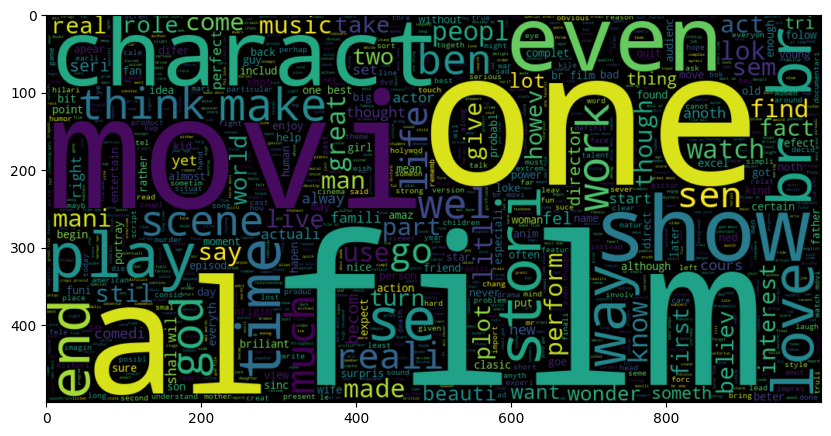

In [80]:
plt.figure(figsize = (10, 10))
wc = WordCloud(width = 1000, height = 500, max_words = 3000).generate(" ".join(df[df['sentiment'] == 'positive']['review']))
plt.imshow(wc, interpolation = 'bilinear')

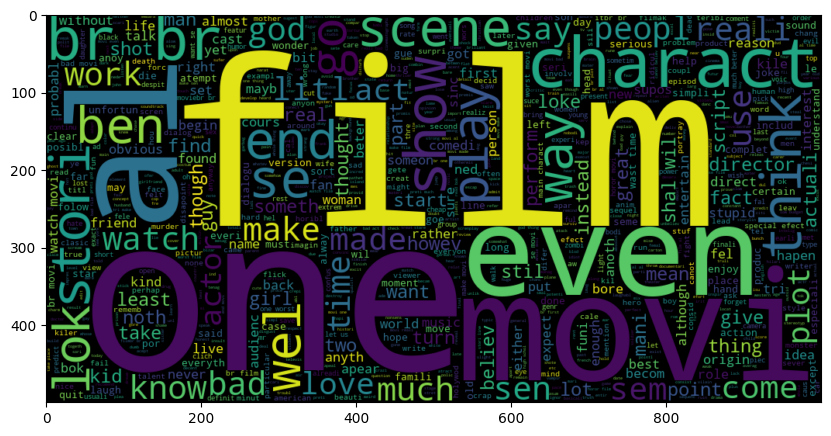

In [81]:
plt.figure(figsize = (10, 10))
wc = WordCloud(width = 1000, height = 500, max_words = 3000).generate(" ".join(df[df['sentiment'] == 'negative']['review']))
plt.imshow(wc, interpolation = 'bilinear')

In [83]:
cv = CountVectorizer()
train_data, test_data = train_test_split(df, train_size = 0.8, random_state = 0)

In [84]:
X_train = cv.fit_transform(train_data['review'])
Y_train = train_data['sentiment']
X_test = cv.transform(test_data['review'])
Y_test = test_data['sentiment']

In [86]:
nb = MultinomialNB()
nb.fit(X_train, Y_train)

MultinomialNB()

In [87]:
Y_pred = nb.predict(X_test)

In [88]:
nb_report1 = accuracy_score(Y_test, Y_pred)

In [89]:
print ('Accuracy is : ', nb_report1)

Accuracy is :  0.8558


In [90]:
nb_report2 = recall_score(Y_test, Y_pred, pos_label='positive', average='binary')
print('Recall is : ', nb_report2)

Recall is :  0.8336354481369587


In [91]:
nb_report3 = precision_score(Y_test, Y_pred, pos_label='positive', average='binary')
print('Precision is : ', nb_report3)

Precision is :  0.8704521556256573


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

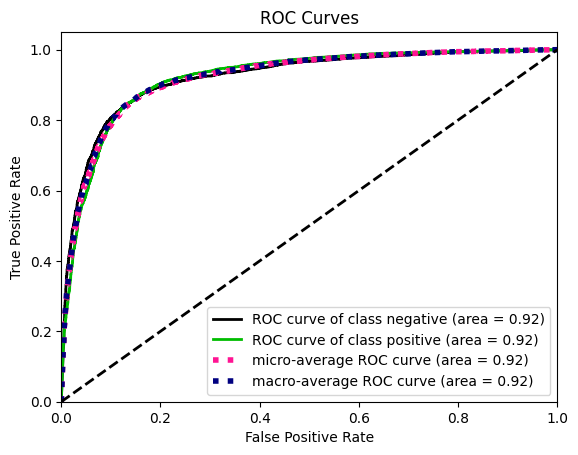

In [92]:
skplt.metrics.plot_roc(Y_test, nb.predict_proba(X_test))

In [112]:
newReview = str(input("Enter the new Review : "))

Enter the new Review :  this is a good movie nobody should watch it


In [113]:
newReview

'this is a good movie nobody should watch it'

In [114]:
sample = np.array([newReview])
a = cv.transform(sample)
print (nb.predict(a))

['negative']


In [115]:
a_good, a_avg, a_bad = [], [], []
a_action, a_comedy, a_drama, a_horror, a_romance = [], [], [], [], []

In [116]:
for i in wordnet.synsets("good") :
    for j in i.lemmas() :
        a_good.append(j.name())
for i in wordnet.synsets("average") :
    for j in i.lemmas() :
        a_avg.append(j.name())
for i in wordnet.synsets("bad") :
    for j in i.lemmas() :
        a_bad.append(j.name())

In [117]:
for i in wordnet.synsets("action") :
    for j in i.lemmas() :
        a_action.append(j.name())
for i in wordnet.synsets("comedy") :
    for j in i.lemmas() :
        a_comedy.append(j.name())
for i in wordnet.synsets("drama") :
    for j in i.lemmas() :
        a_drama.append(j.name())
for i in wordnet.synsets("horror") :
    for j in i.lemmas() :
        a_horror.append(j.name())
for i in wordnet.synsets("romance") :
    for j in i.lemmas() :
        a_romance.append(j.name())

In [118]:
set(a_good)

{'adept',
 'beneficial',
 'commodity',
 'dear',
 'dependable',
 'effective',
 'estimable',
 'expert',
 'full',
 'good',
 'goodness',
 'honest',
 'honorable',
 'in_effect',
 'in_force',
 'just',
 'near',
 'practiced',
 'proficient',
 'respectable',
 'right',
 'ripe',
 'safe',
 'salutary',
 'secure',
 'serious',
 'skilful',
 'skillful',
 'sound',
 'soundly',
 'thoroughly',
 'trade_good',
 'undecomposed',
 'unspoiled',
 'unspoilt',
 'upright',
 'well'}

In [119]:
set(a_avg)

{'average',
 'average_out',
 'fair',
 'intermediate',
 'mean',
 'median',
 'mediocre',
 'medium',
 'middling',
 'modal',
 'norm',
 'ordinary'}

In [120]:
set(a_bad)

{'bad',
 'badly',
 'badness',
 'big',
 'defective',
 'forged',
 'high-risk',
 'regretful',
 'risky',
 'sorry',
 'speculative',
 'spoiled',
 'spoilt',
 'tough',
 'uncollectible',
 'unfit',
 'unsound'}

In [121]:
set(a_action)

{'accomplish',
 'action',
 'action_at_law',
 'action_mechanism',
 'activeness',
 'activity',
 'carry_out',
 'carry_through',
 'execute',
 'fulfil',
 'fulfill',
 'legal_action',
 'litigate',
 'military_action',
 'natural_action',
 'natural_process',
 'process',
 'sue'}

In [122]:
set(a_romance)

{'Latin',
 'Latinian_language',
 'Romance',
 'Romance_language',
 'butterfly',
 'chat_up',
 'coquet',
 'coquette',
 'court',
 'dally',
 'flirt',
 'love_affair',
 'love_story',
 'mash',
 'philander',
 'romance',
 'romanticism',
 'solicit',
 'woo'}

In [123]:
set(a_comedy)

{'clowning', 'comedy', 'drollery', 'funniness'}

In [124]:
set(a_drama)

{'drama', 'dramatic_event', 'dramatic_play', 'play'}

In [125]:
set(a_horror)

{'horror', 'repugnance', 'repulsion', 'revulsion'}

In [126]:
newReview_split = newReview.split(" ")

In [127]:
print (newReview_split)
print ("Type of Splitted Review : " + str(type(newReview_split)))

['this', 'is', 'a', 'good', 'movie', 'nobody', 'should', 'watch', 'it']
Type of Splitted Review : <class 'list'>


In [128]:
a = {"Good" : list(set(a_good)), "Avg" : list(set(a_avg)), "Bad" : list(set(a_bad))}
likinglist = []
for i in newReview_split : 
    temp = []
    for j in a.keys() :
        lis = a[j]
        for k in range(0, len(lis)) :
            if lis[k] == i :
                temp = lis
                break
    for j in a.keys() :
        if (a[j] == temp) :
            likinglist.append(j)
print (likinglist)

['Good']


In [129]:
g = {"Action" : list(set(a_action)), 
    "Comedy" : list(set(a_comedy)),
    "Drama" : list(set(a_drama)),
    "Horror" : list(set(a_horror)),
    "Romance" : list(set(a_romance))}
genrelist = []
for i1 in newReview_split :
    flag = []
    for i in g.keys() :
        lis1 = g[i]
        for j in range(0, len(lis1)) :
            if lis1[j] == i1 :
                flag = lis1
                break
    for i in g.keys() :
        if (g[i] == flag) :
            genrelist.append(i)
print (genrelist)

[]
